In [4]:
import os
import sys

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

from gdlib.Ex1_42_adam_SGD import Ex1_42_adam_SGD
from gdlib.Ex1_43_adam_SGDR import Ex1_43_adam_SGDR
from gdlib.Ex1_44_adam_minibatch import Ex1_44_adam_MB
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def plot_loss_and_lr(loss_history_train, loss_history_test, lr_history = None, min_index = None, min_test_loss = None, title_main = 'Experiment : Loss vs Learning Rate', subtitle = '', figsize = (8, 5.5), save_path = None):
    loss_history_train = np.array(loss_history_train)
    loss_history_test = np.array(loss_history_test)

    plt.style.use('seaborn-v0_8-darkgrid')
    fig, ax1 = plt.subplots(figsize = figsize)
    ax1.set_title(title_main, fontsize = 14, fontweight = 'bold', pad = 24)
    if subtitle:
        fig.text(0.5, 0.893, subtitle, ha = 'center', fontsize = 12, style = 'italic')
    
    # 主軸
    color1 = '#1f77bc'
    color2 = '#ff7f0e'
    color3 = '#003366'
    ax1.set_xlabel('Iterations', fontsize = 14, fontweight = 'bold')
    ax1.set_ylabel('Loss', color = color1, fontsize = 14, fontweight = 'bold')
    ax1.plot(loss_history_train, label = 'Train Loss', color = color1, linewidth = 3, alpha = 0.85, zorder = 3)
    ax1.plot(loss_history_test, label = 'Test Loss', color = color2, linewidth = 3, linestyle = 'dashed', alpha = 0.85, zorder = 3)
    ax1.tick_params(axis = 'y', labelcolor = color1)

    ax1.plot(min_index, min_test_loss, 'o', markersize = 5, label = 'Min Test Loss', color = color3, zorder = 4)

    bbox_props = dict(boxstyle = 'round,pad = 0.4', fc = 'white', lw = 0.8, alpha = 0.85)
    ax1.annotate(
        f'Min : {min_test_loss:.4f} @ Iter {min_index}',
        xy = (min_index, min_test_loss),
        xytext = (max(min_index - len(loss_history_test) * 0.2, 0), min_test_loss + (loss_history_test.max() - loss_history_test.min()) * 0.2),
        textcoords = 'data',
        arrowprops = dict(arrowstyle = '-|>', color = color3, lw = 1.2, zorder = 4),
        fontsize = 12,
        color = color3,
        bbox = bbox_props,
        zorder = 4
    )
    ax1.legend(loc = 'upper right', fontsize = 11, framealpha = 0.9)
    ax1.grid(True, linestyle = 'dashed', linewidth = 0.5, alpha = 0.4, zorder = 0)

    # 副軸
    if lr_history is not None:
        lr_history = np.array(lr_history)
        ax2 = ax1.twinx()
        color4 = '#2ca02c'
        ax2.set_ylabel('Learning Rate', color = color4, fontsize = 14, fontweight = 'bold')
        ax2.plot(lr_history, label = 'Learning Rate', color = color4, linestyle = 'dotted', linewidth = 2, zorder = 1)
        ax2.tick_params(axis = 'y', labelcolor = color4)
    
    fig.tight_layout()
    if save_path is not None:
        fig.savefig(save_path, dpi = 720, bbox_inches = 'tight')
    plt.show()


=== Data Prepared ===
mean =  [30.1526  1.99   14.6872]
scale =  [11.9856  1.0246  8.5246]
Iteration 0 : w = [0.18   0.3168 1.0115], b = 0.3713, Train Loss = 2215.1138, Test Loss = 1864.3051
Iteration 50 : w = [0.9317 0.9127 0.5695], b = 2.2065, Train Loss = 2010.5674, Test Loss = 1694.5460
Iteration 100 : w = [1.706  1.4973 0.206 ], b = 3.9616, Train Loss = 1823.1782, Test Loss = 1537.9824
Iteration 150 : w = [2.2235 1.9559 0.1538], b = 5.5355, Train Loss = 1674.0847, Test Loss = 1407.9048
Iteration 200 : w = [2.7467 2.5028 0.1206], b = 7.1961, Train Loss = 1523.4573, Test Loss = 1276.4055
Iteration 250 : w = [ 3.8068  3.1966 -0.2487], b = 8.9347, Train Loss = 1353.4358, Test Loss = 1135.8808
Iteration 300 : w = [ 4.5883  3.8933 -0.7754], b = 10.6028, Train Loss = 1204.4121, Test Loss = 1014.8238
Iteration 350 : w = [ 5.0306  4.4729 -0.9547], b = 12.0810, Train Loss = 1089.7394, Test Loss = 916.9896
Iteration 400 : w = [ 5.5633  4.7936 -1.3405], b = 13.6492, Train Loss = 976.1045, Tes

,Final Train Loss,Final Test Loss,Best Iteration,Train Loss @ Best Test,Best Test Loss,w (params),b (bias),Learning Rate @ Best Test
0,4.0962,5.6684,10003,3.9761,5.4936,"[18.112, 2.2216, -6.9445]",42.5587,0.04


ValueError: 'upper' is not a valid value for loc; supported values are 'best', 'upper right', 'upper left', 'lower left', 'lower right', 'right', 'center left', 'center right', 'lower center', 'upper center', 'center'

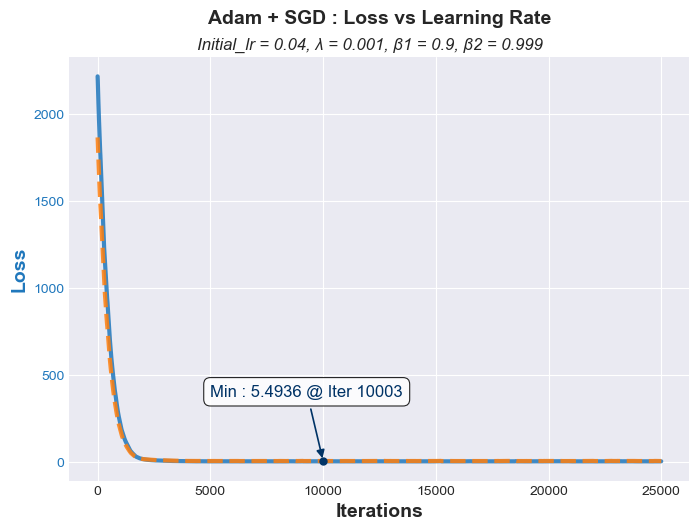

In [6]:
from gdlib.Ex1_42_adam_SGD import Ex1_42_adam_SGD

exp = Ex1_42_adam_SGD(master_seed = 42)

min_test_loss, min_index, best_w, best_b, df_summary, loss_history_train, loss_history_test, lr_history = exp.train_one_lr(initial_lr = 0.04, iterations = 25000)
display(df_summary)

plot_loss_and_lr(
    loss_history_train = loss_history_train, 
    loss_history_test = loss_history_test, 
    lr_history = lr_history, 
    min_index = min_index, 
    min_test_loss = min_test_loss, 
    title_main = 'Adam + SGD : Loss vs Learning Rate', 
    subtitle = f'Initial_lr = {exp.initial_lr}, λ = {exp.lambda_reg}, β1 = {exp.beta1}, β2 = {exp.beta2}', 
    save_path = None
)